In [6]:
import sys,os
import trimesh as tri
import numpy as np
import torch

from utils import mesh_processing, lddmm_utils

GPU = True
device_idx = 0
torch.cuda.get_device_name(device_idx)

if GPU:
    device = torch.device("cuda:"+str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
print(device)

cuda:0


## Define distances

In [7]:
mesh = tri.creation.uv_sphere()
V, F = torch.Tensor(mesh.vertices).to(dtype=torch.float, device = device), torch.Tensor(mesh.faces).to(dtype=torch.int, device=device)

In [8]:
def varifold_dist(mesh1, mesh2, sigma):
    torchdtype = torch.float
    #sig=[2,1,0.5,0.2,0.1,0.08,0.05,0.02,0.01,0.005]
    #for i,sigma in enumerate(sig):
    #    sig[i] = torch.tensor([sigma], dtype=torchdtype, device=device)
    
    sigma = torch.tensor([sigma], dtype=torchdtype, device=device)
    
    # PyKeOps counterpart
    KeOpsdeviceId = device.index  # id of Gpu device (in case Gpu is  used)
    KeOpsdtype = torchdtype.__str__().split(".")[1]  # 'float32'
    
    V1, F1 = torch.Tensor(mesh1.vertices).to(dtype=torchdtype, device=device).requires_grad_(True), torch.Tensor(mesh1.faces).to(dtype=torch.int32, device=device)
    V2, F2 = torch.Tensor(mesh2.vertices).to(dtype=torchdtype, device=device).requires_grad_(True), torch.Tensor(mesh2.faces).to(dtype=torch.int32, device=device)
    L = torch.Tensor([0.]).to(device)
    #for sigma in sig:
    L += lddmm_utils.lossVarifoldSurf(F1, V2, F2,lddmm_utils.GaussLinKernel_current(sigma=sigma))(V1)

        #reg = (lddmm_utils.VarifoldSurfPS(F1, V_template, F1,lddmm_utils.GaussSquaredKernel_varifold_unoriented(sigma=sig[4]))(V1) - lddmm_utils.VarifoldSurfPS(F2, V_template, F2,lddmm_utils.GaussSquaredKernel_varifold_unoriented(sigma=sig[4]))(V2)).abs()
    
    return L.item()

### Visualize kernels

In [10]:
import matplotlib.pyplot as plt

In [55]:
def GaussKernel(x,y, sigma=1):
    return((1/sigma**2) * np.exp(-(np.linalg.norm(y - x, axis=0))**2/sigma**2))

In [94]:
import numpy as np
import scipy.stats as st
import scipy

def gausskern(kernlen=101, nsig=30):
    """Returns a 2D Gaussian kernel."""

    kern1d = scipy.signal.windows.gaussian(kernlen, std=nsig).reshape(kernlen, 1)
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

def expkern(kernlen=101, nsig=30):
    """Returns a 2D Gaussian kernel."""

    kern1d = scipy.signal.windows.exponential(kernlen, tau=nsig).reshape(kernlen, 1)
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

def expkern(kernlen=101, nsig=30):
    """Returns a 2D Gaussian kernel."""

    kern1d = scipy.signal.windows.exponential(kernlen, tau=nsig).reshape(kernlen, 1)
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

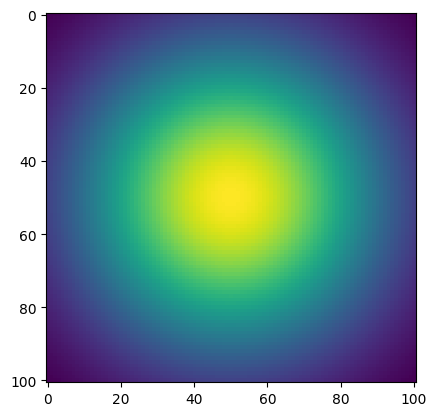

In [95]:
plt.imshow(gausskern())

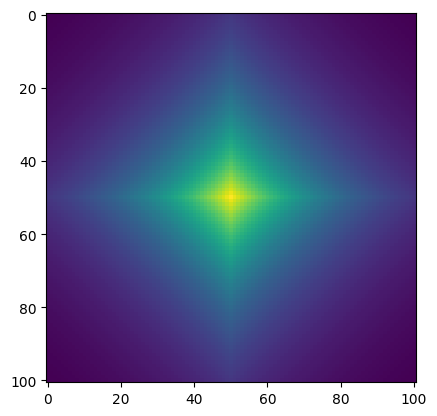

In [96]:
plt.imshow(expkern())

In [103]:
def triangkern(kernlen=101, nsig=30):
    """Returns a 2D Gaussian kernel."""

    kern1d = scipy.signal.windows.triang(kernlen).reshape(kernlen, 1)
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

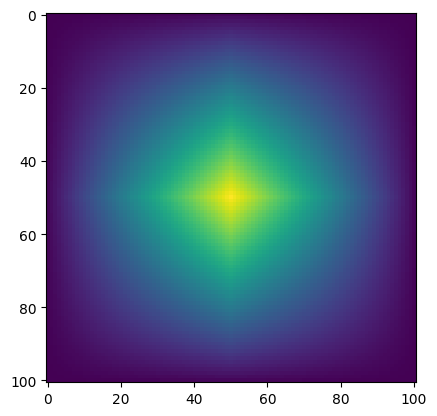

In [104]:
plt.imshow(triangkern())